In [1]:
#GLIMS buffer + clip
#May 25,2023 

import os
import geopandas as gpd


/var/folders/3j/6dy_9gxj7vvgct178jkkp1680000gn/T/ipykernel_98792/4201670901.py:5: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.readthedocs.io/en/latest/migration_pygeos.html).
  import geopandas as gpd


In [2]:
#help(geopandas)
#help(gpd)

In [3]:
data_directory = os.path.join(os.path.expanduser("~"),'Desktop', 'GitHub', 'Chile-Glaciers', 'data')
#tilda tells it to go look for the home of your computer 
data_directory

'/Users/milliespencer/Desktop/GitHub/Chile-Glaciers/data'

In [4]:
studyareas_path = os.path.join(data_directory, 'studyareas', 'studyareas.shp')
glims_path = os.path.join(data_directory, 'RGI_17.SouthernAndes', '17_rgi60_SouthernAndes.shp')


In [5]:
studyareas = gpd.read_file(studyareas_path)
glims = gpd.read_file(glims_path)


In [6]:
print(glims.crs)
print(studyareas.crs)
#studyareas.bounds

utm_19s_crs = 'EPSG:32719'
studyareas = studyareas.to_crs(utm_19s_crs)
glims = glims.to_crs(utm_19s_crs)

print(glims.crs)
print(studyareas.crs)

epsg:4326
GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433],AXIS["Longitude",EAST],AXIS["Latitude",NORTH]]
EPSG:32719
EPSG:32719


In [7]:
#first clip glims to the study areas: 
glimsclip = glims.clip(studyareas)
glimsclip = glimsclip.dissolve()

#buffer time! :) 
glimsclipbuffer = glimsclip.buffer(1000)

/Users/milliespencer/miniconda3/envs/earth-analytics-python/lib/python3.8/site-packages/pygeos/set_operations.py:129: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)
/Users/milliespencer/miniconda3/envs/earth-analytics-python/lib/python3.8/site-packages/pygeos/constructive.py:175: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(


In [10]:
glimscliptest = glims.clip(studyareas)

/Users/milliespencer/miniconda3/envs/earth-analytics-python/lib/python3.8/site-packages/pygeos/set_operations.py:129: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)


In [15]:
#glimscliptest.plot()
import folium
m = folium.Map(location=[-33.018, -69.451], zoom_start=10)

glimscliptest = glimscliptest.to_crs('EPSG:4326')

for _, r in glimscliptest.iterrows():
    # Without simplifying the representation of each glacier,
    # the map might not be displayed
    sim_geo = gpd.GeoSeries(r["geometry"])
    geo_j = sim_geo.to_json()
    geo_j = folium.GeoJson(data=geo_j, style_function=lambda x: {"fillColor": "orange"})
    geo_j.add_to(m)
m

In [8]:
#glimsclip.geometry = glimsclipbuffer
#glimsclip
#nvm, geometry is kind irrelevant here since it'll only give us glacier area (eg) for the 1st one of the mega glacier polygon

glimsclipbuffer.to_file(os.path.join(data_directory, 'glims_buffer', 'glims_buffer.shp'))


<Axes: >

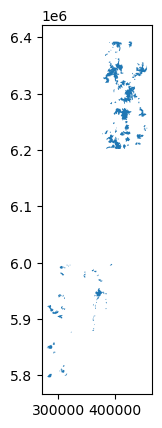

In [9]:
glimsclipbuffer.plot()
